# Basic Convolutional Neural Network capable of testing

In [78]:
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf
from tensorflow.keras import layers
#Preprocess cats_vs_dogs images
totalSet = tfds.load('cats_vs_dogs', split='train', shuffle_files=True)
#final image size
IMG_SIZE = 64
#resize and rescale images function
resize_and_rescale =  tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE),
  layers.experimental.preprocessing.Rescaling(1./127.5, offset=-1)
])
#loop through
trainX = []
trainY = []
i = 0
for example in totalSet:  # example is `{'image': tf.Tensor, 'label': tf.Tensor}`
  #resize images
  i += 1
  trainX.append(np.array(resize_and_rescale(example['image'])))
  trainY.append(np.array(example['label']))


In [80]:
#set as arrays
trainX = np.asarray(trainX)
trainY = np.asarray(trainY)
#reshape the array
print(trainX.shape,trainY.shape)

(23262, 64, 64, 3) (23262,)


In [83]:
pip install git+https://www.github.com/keras-team/keras-contrib.git


  Cloning https://www.github.com/keras-team/keras-contrib.git to /tmp/pip-req-build-q3cp772v
  Running command git clone -q https://www.github.com/keras-team/keras-contrib.git /tmp/pip-req-build-q3cp772v
  Created wheel for keras-contrib: filename=keras_contrib-2.0.8-cp36-none-any.whl size=101066 sha256=13c95fd5830c0606cab9997c6acaa27d82e790f82d0199787da3b63ac41d36d6
  Stored in directory: /tmp/pip-ephem-wheel-cache-_f3m1oxa/wheels/11/27/c8/4ed56de7b55f4f61244e2dc6ef3cdbaff2692527a2ce6502ba
Successfully built keras-contrib


In [84]:
#impliment and develop Model
from keras import models
from keras import layers
from keras import regularizers

#sequential convolutional neural network model
network = models.Sequential()
network.add(layers.Conv2D(128,(3,3),input_shape=(64,64,3)))
network.add(layers.LeakyReLU())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Conv2D(64,(3,3)))
network.add(layers.LeakyReLU())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Conv2D(32,(3,3)))
network.add(layers.LeakyReLU())
network.add(layers.MaxPooling2D(pool_size=(2,2)))
network.add(layers.Flatten())
network.add(layers.Dense(128,  kernel_regularizer=regularizers.l2(0.001)))
network.add(layers.LeakyReLU())
network.add(layers.Dense(1,activation='sigmoid'))

network.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

#split data into validation and training
val_x = trainX[:1000]
partial_x = trainX[1000:]
val_y = trainY[:1000]
partial_y = trainY[1000:]

#fit
history = network.fit(partial_x,partial_y,epochs=100,batch_size=128,validation_data=(val_x,val_y))


Epoch 1/100
174/174 [==============================] - 5s 26ms/step - loss: 0.7220 - accuracy: 0.6597 - val_loss: 0.5686 - val_accuracy: 0.7600
Epoch 2/100
174/174 [==============================] - 4s 26ms/step - loss: 0.5237 - accuracy: 0.7645 - val_loss: 0.4907 - val_accuracy: 0.7960
Epoch 3/100
174/174 [==============================] - 4s 25ms/step - loss: 0.4621 - accuracy: 0.7991 - val_loss: 0.4627 - val_accuracy: 0.8050
Epoch 4/100
174/174 [==============================] - 4s 25ms/step - loss: 0.4192 - accuracy: 0.8217 - val_loss: 0.4461 - val_accuracy: 0.8030
Epoch 5/100
174/174 [==============================] - 4s 25ms/step - loss: 0.3842 - accuracy: 0.8384 - val_loss: 0.4557 - val_accuracy: 0.8070
Epoch 6/100
174/174 [==============================] - 4s 25ms/step - loss: 0.3556 - accuracy: 0.8550 - val_loss: 0.4243 - val_accuracy: 0.8150
Epoch 7/100
174/174 [==============================] - 4s 25ms/step - loss: 0.3271 - accuracy: 0.8691 - val_loss: 0.4525 - val_accuracy:

0.8420000076293945


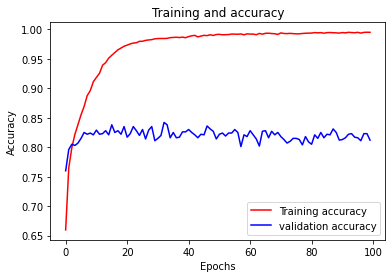

In [85]:
#show loss and accuracy
#get loss for training
acc = np.asarray(history.history['accuracy'])
#get loss for testing
val_acc = np.asarray(history.history['val_accuracy'])
# x axis will display epochs running from 1 to the number of losses we have  - 1
epochs = np.asarray(range(len(acc)))
pyplot.plot(epochs,acc,'r',label='Training accuracy')
pyplot.plot(epochs,val_acc,'b',label='validation accuracy')
pyplot.title('Training and accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Accuracy')
pyplot.legend()
print(max(val_acc))
pyplot.show()


In [96]:
#Test Image
from keras.preprocessing import image
name = 'cat.jpg'
instance = image.load_img(name, target_size = (64,64))
instance = image.img_to_array(instance)
instance = np.array(resize_and_rescale(instance))

#test on network
answer = network.predict(np.asarray([instance]))
if answer[0][0] >= 0.5:
  print("We have classified it as a dog")
else:
  print("We have classified it as a cat")

We have classified it as a cat
